# XY Model Analysis

In [1]:
# import ising_lib
# from imp import reload 
# reload(ising_lib)

In [3]:
from ising_lib import *
%matplotlib inline
from matplotlib import cm

## Raw Data Aquisition and PreProcessing

In [5]:
# BASE_FOLDER='../simulation_data/raw/n64_rg_sbf_folded/'
BASE_FOLDER='../simulation_data/raw/n128_rg_sbf_folded/'
tag_name=BASE_FOLDER[:-1].split("/")[-1]
f=open(BASE_FOLDER+"fnames.txt",'r')
fnames=[]
l=f.readline()
while l:
    fnames.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print("Files to be analyzed : " ,len(fnames))

Files to be analyzed :  22


In [35]:
make_acf_config([2,4,8,12,16])

Reading  1  /  22  L =  128  T =  1  J =  3.6  H4 =  0.06  h8 =  0.15 ...  CT =  489 CT err =  4.99 status :  True
Reading  2  /  22  L =  128  T =  1  J =  3.7  H4 =  0.06  h8 =  0.15 ...  CT =  674 CT err =  7.17 status :  True
Reading  3  /  22  L =  128  T =  1  J =  3.8  H4 =  0.06  h8 =  0.15 ...  CT =  884 CT err =  4.30 status :  True
Reading  4  /  22  L =  128  T =  1  J =  4  H4 =  0.06  h8 =  0.15 ...  CT =  386 CT err =  3.92 status :  True
Reading  5  /  22  L =  128  T =  1  J =  4.1  H4 =  0.06  h8 =  0.15 ...  CT =  785 CT err =  5.00 status :  True
Reading  6  /  22  L =  128  T =  1  J =  4.2  H4 =  0.06  h8 =  0.15 ...  CT =  1003 CT err =  6.09 status :  True
Reading  7  /  22  L =  128  T =  1  J =  4.3  H4 =  0.06  h8 =  0.15 ...  CT =  1819 CT err =  10.81 status :  True
Reading  8  /  22  L =  128  T =  1  J =  4.4  H4 =  0.06  h8 =  0.15 ...  CT =  743 CT err =  5.19 status :  True
Reading  9  /  22  L =  128  T =  1  J =  4.5  H4 =  0.06  h8 =  0.15 ...  CT =

### Creating '.config' file with 'acf' values for resampling 

        After making raw simulation files from the xy_sweep/(or any other) make the config files used by 
        resampling code .. this makes the config files that have file name with .dat extension , correlation time 
        , correlation error and status in csv format

In [7]:
# Recheck Multiliters 
multipliers=[0.6, 1 , 1.6]

# MAX LAGS CONSIDERED FOR FINDING acf ; 
MAX_LAGS=12000

# FIT LENGTH CONSIDERED for fit acf curve ; 
FCOA=None # None :> = MAX_LAGS

#Thermalization skip for dataset ; 
THERMAL_SKIP=0 

def make_acf_config(RG=[]):
    config=open(BASE_FOLDER+'resampling.config','w')
    if(RG!=[]):
        Mconfig=open(BASE_FOLDER+'Mresampling.config','w')
    error=open(BASE_FOLDER+'resampling_error_log.config','w')
    L=len(fnames)
    count=0
    ct,ct_err,status=[],[],[]
    for i in multipliers:
        ct.append(0)
        ct_err.append(0)
        status.append(False)

    for name in fnames:
        count+=1
        rslt=get_data_xyModel(name)
        print("Reading ",count," / ",L," L = ",rslt['params']['length of lattice  ']," T = ",rslt['params']['T   '],
              " J = ",rslt['params']['J   ']," H4 = ",rslt['params']['h4   ']," h8 = ",rslt['params']['h8   '],
              end=" ... ")
        for i in range(len(multipliers)):
            ct[i],ct_err[i],status[i]=get_correlation_values(rslt['time'][THERMAL_SKIP:],
                                                                rslt['energy'][THERMAL_SKIP:],
                                                                rslt['magentization_x'][THERMAL_SKIP:],
                                                                int(MAX_LAGS*multipliers[i]),
                                                                fit_count_of_acf=FCOA)
        if max(ct)-min(ct) > 100:
            print("ALERT @ ",name,"  ",max(ct)-min(ct))
            error.write(name+" : \n")
            error.write("MAX LAGS, CT , CT_err ,status \n")
            for idx in range(len(multipliers)):
                error.write("{0:.2f}".format(MAX_LAGS*multipliers[i])+",")
                error.write("{0:.2f}".format(ct[idx])+","+
                            "{0:.2f}".format(ct_err[idx])+","+
                              str(status[idx])+"\n")
    #     else:
        idx=ct.index(max(ct))
        config.write(name.split('/')[-1][:-4]+","+
                     "{0:.2f}".format(ct[idx])+","+
                     "{0:.2f}".format(ct_err[idx])+","+
                     str(status[idx])+"\n")
        for rg in RG:
            Mconfig.write(name.split('/')[-1][:-4]+"_RG_"+str(rg)+","+
                     "{0:.2f}".format(ct[idx])+","+
                     "{0:.2f}".format(ct_err[idx])+","+
                     str(status[idx])+"\n")
        print(" CT = ",ct[idx],"CT err = ","{0:.2f}".format(ct_err[idx]),"status : ",status[0])
    error.close()
    config.close()

## Verification for ACF

In [22]:
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf 
%matplotlib inline

../extracted_data/acf_n128_rg_sbf_folded.png
1  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_3.600_h4_0.060_h8_0.150_xy.txt
2  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_3.700_h4_0.060_h8_0.150_xy.txt
3  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_3.800_h4_0.060_h8_0.150_xy.txt
4  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.000_h4_0.060_h8_0.150_xy.txt
5  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.100_h4_0.060_h8_0.150_xy.txt
6  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.200_h4_0.060_h8_0.150_xy.txt
7  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.300_h4_0.060_h8_0.150_xy.txt
8  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.400_h4_0.060_h8_0.150_xy.txt
9  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.500_h4_0.060_h8_0.150_xy.txt
10  /  22 ../simulation_data/raw/n128_rg_sbf_folded/L_128_T_1.000_J_4.600

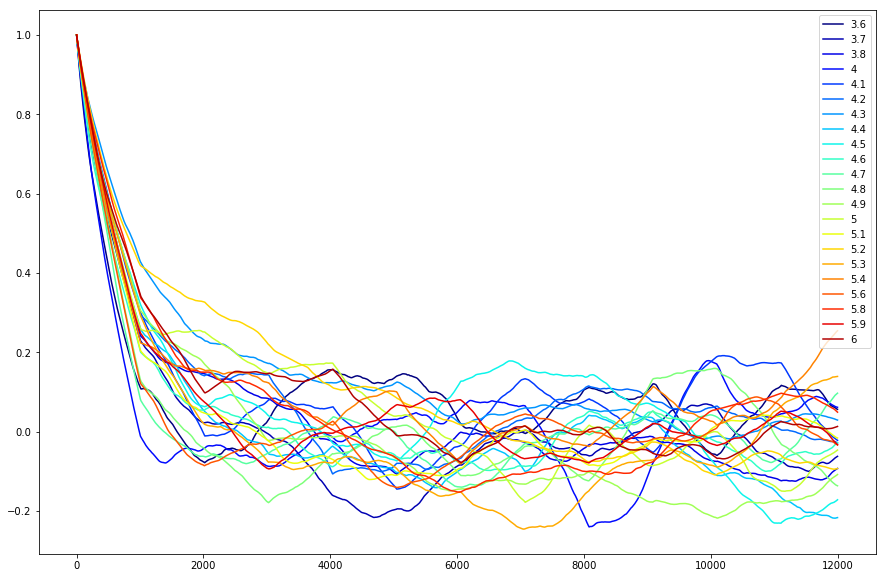

In [8]:
Len=len(fnames)
print('../extracted_data/acf_'+tag_name+".png")
plt.figure(figsize=(15,10))
ma=len(fnames)
if ma > 0   :
    factor=1/(ma)
else:
    factor=0
for idx in range(len(fnames)):
    print(idx+1," / ",Len , fnames[idx])
    data=get_data_xyModel(fnames[idx])
    K_fit=FCOA
    Max_lags=MAX_LAGS
    c=acf(data['energy'],nlags=Max_lags,fft=True)
    plt.plot([i for i in range(len(c[:K_fit]))],c[:K_fit],label=str(data['params']['J   ']),c=cm.jet(idx*factor))
plt.legend(loc=1)
plt.savefig('../extracted_data/acf_'+tag_name+".png",dpi=300)